COLLEGE PLACEMENT PREDICTION USING ML 

In [1]:
import pandas as pd
import numpy as np

LOAD DATASET

In [2]:
df=pd.read_csv("D:\Data Science With Python\dataset\Logistic dataset\college_student_placement_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dines\AppData\Local\Temp\ipykernel_27556\4028012568.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\Data Science With Python\dataset\Logistic dataset\college_student_placement_dataset.csv")


FEATURE ENGINEERING

In [3]:
df.head(5)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,1,6,1,No,NaN,NaN
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [5]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           1
CGPA                      1
Academic_Performance      0
Internship_Experience     1
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        2
Placement                 6
dtype: int64

In [6]:
df.isnull().sum().sum()

np.int64(11)

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         9999 non-null   float64
 3   CGPA                    9999 non-null   float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   9999 non-null   object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  object 
 8   Projects_Completed      9998 non-null   object 
 9   Placement               9994 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [9]:
df.drop(columns='College_ID',inplace=True)

In [10]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,99.477029,7.535169,7.531768,5.546492,4.971975
std,15.049323,1.447526,1.470106,2.873861,3.160000
min,41.000000,5.000000,4.540000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000
75%,110.000000,8.785000,8.770000,8.000000,8.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Communication_Skills']=le.fit_transform(df['Communication_Skills'])
df['Projects_Completed']=le.fit_transform(df['Projects_Completed'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      9991 non-null   int64  
 1   Prev_Sem_Result         9991 non-null   float64
 2   CGPA                    9991 non-null   float64
 3   Academic_Performance    9991 non-null   int64  
 4   Internship_Experience   9991 non-null   object 
 5   Extra_Curricular_Score  9991 non-null   int64  
 6   Communication_Skills    9991 non-null   int64  
 7   Projects_Completed      9991 non-null   int64  
 8   Placement               9991 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 780.5+ KB


PLOTS

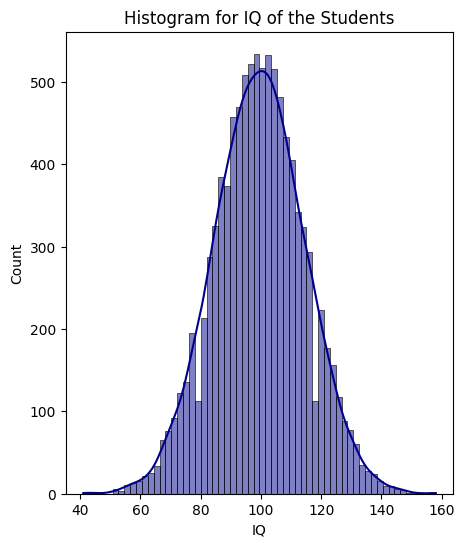

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,6))
sns.histplot(df['IQ'],kde=True,color='darkblue')
plt.title('Histogram for IQ of the Students')
plt.show()
#It shows normal distribution

In [19]:
df['Placement'].unique()

array(['No', 'Yes'], dtype=object)

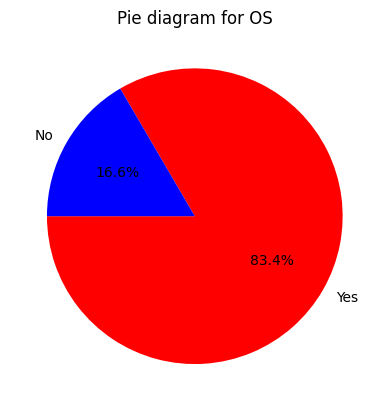

In [ ]:
pie=df['Placement'].value_counts()
plt.pie(pie,labels=['Yes','No'],autopct='%1.1f%%',colors=['red','blue'],startangle=180)
plt.title('Placement percentage of the Students')
plt.show()
#This graph shows more students placed in interview

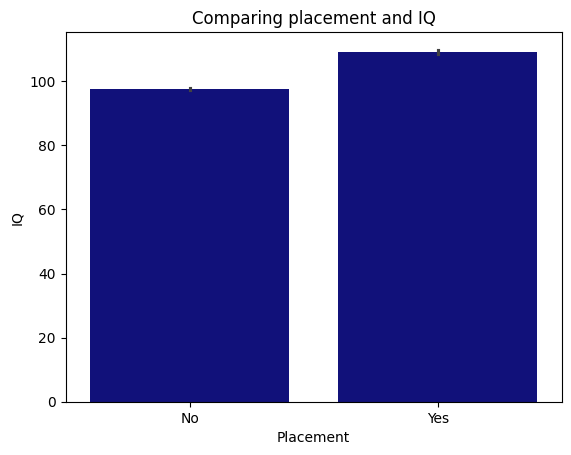

In [24]:
sns.barplot(data=df,x='Placement',y='IQ',color='darkblue')
plt.title('Comparing placement and IQ')
plt.show()
#This shows placed students had more than 100 IQ

C:\Users\dines\AppData\Local\Temp\ipykernel_27556\1883573892.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.violinplot(data=df,x='Placement',y='CGPA',hue='Internship_Experience',color='red',split=True)


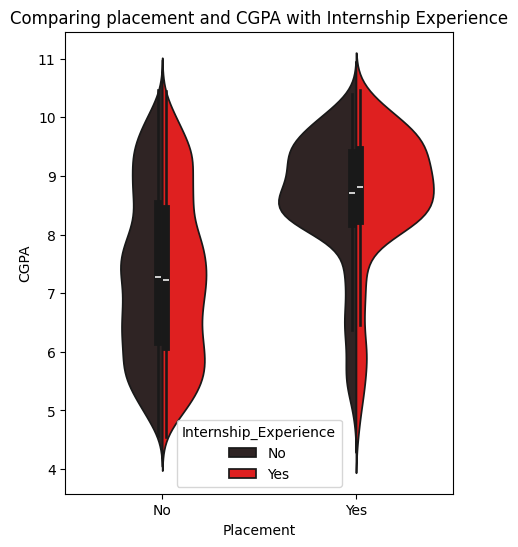

In [ ]:
plt.figure(figsize=(5,6))
sns.violinplot(data=df,x='Placement',y='CGPA',hue='Internship_Experience',color='red',split=True)
plt.title('Comparing placement and CGPA with Internship Experience')
plt.show()
#This graph shows maximum placed students got 8-10 percentage CGPA equally with or without internship experience.

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Internship_Experience']=le.fit_transform(df['Internship_Experience'])
df['Placement']=le.fit_transform(df['Placement'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      9991 non-null   int64  
 1   Prev_Sem_Result         9991 non-null   float64
 2   CGPA                    9991 non-null   float64
 3   Academic_Performance    9991 non-null   int64  
 4   Internship_Experience   9991 non-null   int64  
 5   Extra_Curricular_Score  9991 non-null   int64  
 6   Communication_Skills    9991 non-null   int64  
 7   Projects_Completed      9991 non-null   int64  
 8   Placement               9991 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 780.5 KB


In [42]:
df.duplicated().sum()

np.int64(0)

FIT MODEL

In [43]:
x=df.drop(['Placement'],axis=1)
y=df['Placement']
x

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,0,1
4,96,7.91,7.69,7,0,8,1,2
5,96,5.26,5.32,7,0,5,8,0
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0
9996,70,9.25,9.34,7,0,0,7,2
9997,89,6.08,6.25,3,1,3,9,5
9998,107,8.77,8.92,3,0,7,5,1


In [44]:
y

0       0
1       0
2       0
4       0
5       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Placement, Length: 9991, dtype: int64

 USING STANDARDSCALER FOR NORMALISATION

In [45]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.49991266, -0.63916973, -0.85152392, ...,  0.95828375,
         1.22166254,  0.86613444],
       [-0.16460231, -1.39221623, -1.47055798, ...,  0.64181223,
         1.22166254, -1.4643171 ],
       [ 0.63281565, -1.50275517, -1.15763966, ..., -0.62407386,
        -1.54833103, -0.88170422],
       ...,
       [-0.69621428, -1.00532996, -0.87193164, ..., -0.62407386,
         1.56791173,  1.44874733],
       [ 0.49991266,  0.85310589,  0.9443551 , ...,  0.64181223,
         0.18291495, -0.88170422],
       [ 0.63281565,  1.29526163,  1.52257372, ..., -0.62407386,
         0.18291495,  1.44874733]], shape=(9991, 8))

PREDICT MODEL

In [46]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)                      #this is for train
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))          
print(accuracy_score(y_test,y_pred))

[[6403  285]
 [ 717  587]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6688
           1       0.67      0.45      0.54      1304

    accuracy                           0.87      7992
   macro avg       0.79      0.70      0.73      7992
weighted avg       0.86      0.87      0.86      7992

0.8746246246246246


In [47]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_test,y_test)                   
y_pred=model.predict(x_test)                 #this is for test
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))          
print(accuracy_score(y_test,y_pred))

[[6445  243]
 [ 751  553]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6688
           1       0.69      0.42      0.53      1304

    accuracy                           0.88      7992
   macro avg       0.80      0.69      0.73      7992
weighted avg       0.86      0.88      0.86      7992

0.8756256256256256


THIS IS GENERALISED FIT